<a href="https://colab.research.google.com/github/KangMiju/class2021Fall/blob/main/20211117.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np #numpy를 np라고 쓰겠다. 
import matplotlib.pyplot as plt # matplotlib 속의 pyplot을 plt라고 쓰겠다. 
import IPython.display as ipd # lPython의 display를 ipd라고 쓰겠다. 

In [3]:
# parameter setting 
amp = 1          # range [0.0, 1.0]
sr = 10000       # sampling rate, Hz
dur = 0.5        # in seconds
freq = 100.0     # sine frequency, Hz
phase = np.pi/2  # phase, radian

#amp, sr, dur, freq, phase의 값을 위와 같다고 명시하는 것이다. 

In [4]:
# generate samples
nSamp = sr * dur #nSamp라는 값은 sampling rate 과 dur의 값을 곱한 것이다.
samples = np.arange(1, nSamp+1) # np.arange함수는 numpy.arange([start, ] stop, [step, ] dtype=None)구조로 쓰이는 데, 반열린 구간인 [start, stop)에서 step의 크기만큼 떨어져 있는 숫자들을 array형태로 변형해준다. 
#start와 step값은 명시되지 않아도 각각 0과 1의 기본값을 가진다. 예를 들어 np.arrange(3,8)에서는 stop이 전달되지 않았기에 기본값 1을 가져서 array([3,4,5,6,7])이라는 결과가 도출된다. 
#즉, 본 식에서는 samples는 1이상 nSamp+1의 값 사이에서 1의 크기만큼 균일하게 떨어져 있는 숫자들이 array형태로 도출될 것이다.



In [6]:
# convert samples to time
t = samples/sr #time을 나타내는 t값은 array로 나타난 samples값을 위에서 명시한 sr의 값인 10000로 나눈 값이다. 
t

array([1.000e-04, 2.000e-04, 3.000e-04, ..., 4.998e-01, 4.999e-01,
       5.000e-01])

In [8]:
# convert time to angle in radian
theta0 = t * 2*np.pi * freq #sine함수가 받는 값은 각도값이기 때문에 angle로 변형해주는 과정이 필요하다. theta0를 위에서 구한 t에 2파이 * frequency값인 100을 곱한다.
theta0

array([6.28318531e-02, 1.25663706e-01, 1.88495559e-01, ...,
       3.14033602e+02, 3.14096434e+02, 3.14159265e+02])

In [10]:
# shift angle by phase
theta = theta0 + phase
#theta는 theta0에서 phase만큼 이동한다.

In [11]:
# generate signal by sin-phasor
s = amp * np.sin(theta)
#s는 위에서 구한 theta값을 radian으로 하는 sin곡선을 1배한 값이다. (amp에 어떠한 값을 넣느냐에 따라 달라짐)

Text(0, 0.5, 'real')

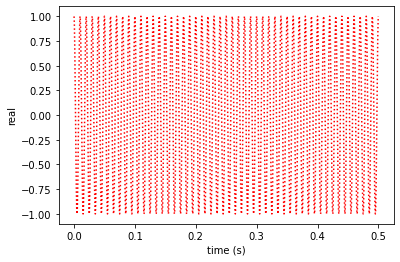

In [17]:
# plot the entire signal
plt.plot(t, s, 'r:') #x값은 t, s값은 y인 sine모양 그래프를 작은 점으로 표현하라
plt.xlabel('time (s)') #x축에는 time(s)라고 이름 붙여라.
plt.ylabel('real') #y축에는 real이라고 이름 붙여라

Text(0, 0.5, 'real')

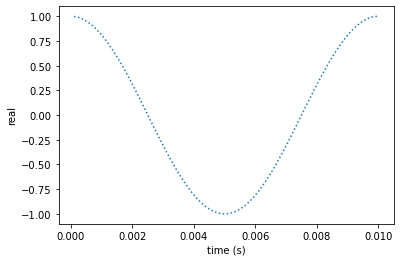

In [18]:
# plot a certain of signals
sampleRng = np.arange(0,100) #sampleRng는 0이상 99이하의 모든 자연수가 array로 표현된다. 
plt.plot(t[sampleRng], s[sampleRng], ':') #x값은 t[sampleRng]값, y값은 s[sampleRng]로 하는 그래프를 작은 점으로 표현하라. 
plt.xlabel('time (s)') # x축에 time (s)라고 이름지어라.
plt.ylabel('real') # y축에 real라고 이름지어라. 

In [20]:
ipd.Audio(s, rate=10000) #ipd.Audio를 쓰면 Python에서 오디오 파일을 들을 수 있고, 또한 이 함수는 numpy array를 받기도 한다. 
#lPython.display.Audio는 IPython.display.Audio(data=None, filename=None, url=None, embed=None, rate=None, autoplay=False, normalize=True, *, element_id=None)의 구조를 갖는다. s그래프의 rate가 1000일때의 음성을 들을 수 있다.

In [22]:
def phasor_sine(amp, sr, dur, freq, phase): #phasor_sine(amp, sr, dur, freq, phase)라는 함수를 새로이 만들었는데, 이 함수에서
  t = np.arange(1, sr * dur+1)/sr           #입력값(amp, sr, dur, freq, phase)를 통해서 쓰여져 있는 대로 각각 t, theta, s를 도출한다.
  theta = t * 2*np.pi * freq + phase
  s = amp * np.sin(theta)
  return s, t, theta                        #이 함수를 실행하면 차례대로 s, t, theta값이 도출된다. 

In [28]:
amp = 1; sr = 10000; dur = 1; freq = 440; phase = 0 #각각의 값이 이와 같고
s, t, theta = phasor_sine(amp, sr, dur, freq, phase) #s값, t값, theta값은 차례로 각각 phasor_sine(amp, sr, dur, freq, phase)에서 도출되는 결과에 해당한다. 
ipd.Audio(s, rate=sr) # rate이 주어진 sr, 즉 sampling rate인 s그래프의 소리를 재생하는 함수.


In [ ]:
amp = 1; sr = 10000; 
#F, D, Eb, Bb의 값은 다음과 같다. 
F  = 698.46 
D  = 587.33 
Eb = 622.25 
F  = 698.46 
Bb = 932.33

empty = np.empty(0) 
#np.empty함수는 주어진 형태와 타입을 갖는 새로운 어레이를 반환한다. np.empty(shape=(a,b), dtype=c)일때, np.empty함수는 배열에서 행이 a개 열이 b개이며 c타입인 배열을 만든다. 

tmp, t, theta= phasor_sine(amp, sr, 0.25, F, phase) #phasor_sine(amp, sr, 0.25, F, phase) 에서 도출되는 array는 차례로, tmp, t, theta값이다. 
all = np.concatenate((empty, tmp)) #numpy.concatenate함수는 지정된 축에서 여러가지의 배열을 연결하는 함수이다. numpy.concatenate((a1, a2,...), axis= 0,out= None) 형식으로 쓰이는데, 
#이때 입력 배열인 a와 b는 같은 모양이어야 한다. axis는 정수로 나타나며 기본값 0일 시에는 연결이 행단위로 이루어진다는 것을, 기본값이 1이면 열단위로 이루어진다. 

tmp, t, theta = phasor_sine(amp, sr, 1, D, phase) #phasor_sine에 입력된 값들에 맞게 tmp, t, theta를 다시 도출하고 이를 np.concatenate((all, tmp))에 넣어 계산하는 작업을 거친다.
all = np.concatenate((all, tmp)) #바로 위 식에서 구한 all값을 np.concatenate에 입력하여 다시 all을 구함.

tmp, t, theta = phasor_sine(amp, sr, 0.25, D, phase) #위에서 했던 것을 반복. 
all = np.concatenate((all, tmp*0)) 

tmp, t, theta = phasor_sine(amp, sr, 0.25, D, phase) #위에서 했던 것을 반복.
all = np.concatenate((all, tmp))

tmp, t, theta = phasor_sine(amp, sr, 0.25, Eb, phase) #위에서 했던 것을 반복.
all = np.concatenate((all, tmp))

tmp, t, theta = phasor_sine(amp, sr, 0.25, F, phase) #위에서 했던 것을 반복.
all = np.concatenate((all, tmp))

tmp, t, theta = phasor_sine(amp, sr, 0.25, D*2, phase) #위에서 했던 것을 반복.
all = np.concatenate((all, tmp))

tmp, t, theta = phasor_sine(amp, sr, 0.25, D, phase) #위에서 했던 것을 반복.
all = np.concatenate((all, tmp*0))

tmp, t, theta = phasor_sine(amp, sr, 0.25, D*2, phase) #위에서 했던 것을 반복.
all = np.concatenate((all, tmp))

tmp, t, theta = phasor_sine(amp, sr, 0.25, D, phase) #위에서 했던 것을 반복.
all = np.concatenate((all, tmp*0))

tmp, t, theta = phasor_sine(amp, sr, 0.75, Bb, phase) #위에서 했던 것을 반복.
all = np.concatenate((all, tmp))


In [ ]:
ipd.Audio(all, rate=sr) #위의 all을 sr인 rate로 한 음을 재생